youtube video link :  https://www.youtube.com/watch?v=29ZQ3TDGgRQ&ab_channel=DataProfessor

## Loading the dataset

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## Data seperation

### data seperation as x and y

In [2]:
y = df['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [3]:
x = df.drop('logS', axis= 1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### data spliting into test and train set

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 69)
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
796,2.6477,154.253,1.0,0.000000
207,3.3260,156.269,7.0,0.000000
1092,0.4043,356.227,6.0,0.285714
533,0.6930,210.233,0.0,0.000000
209,1.4149,102.177,3.0,0.000000
...,...,...,...,...
278,1.9475,116.204,3.0,0.000000
404,2.0905,259.762,5.0,0.375000
439,3.4718,182.266,3.0,0.857143
619,3.6212,296.552,4.0,0.000000


## Model training


### linear regression

#### training the model

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

#### applying the model to make prediction

In [6]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)
y_lr_test_pred

array([-6.43388046, -1.99975664,  0.62250324, -4.15334005, -3.45091778,
       -1.41374074, -2.4855601 , -3.66488197, -4.29846871, -2.3656468 ,
       -1.86679825, -4.58632851, -2.8162141 , -0.41699836, -2.52170064,
       -1.56593445, -7.08937341, -2.9561131 , -3.95112132, -4.30406435,
       -2.49935469, -9.19039835, -1.29179243, -2.36812098, -3.09760402,
       -2.44999973, -3.34962531, -1.56933724, -3.3477083 , -1.24906373,
       -3.08234234, -4.72497904, -5.40825349, -2.98007675, -1.5206233 ,
       -5.16340499, -2.69479363, -2.77437792, -1.27736327, -1.90568801,
       -3.37720476, -4.49045537, -2.83802432, -1.73380803,  0.33572748,
       -3.10017419, -2.5556591 , -3.44058028, -5.00325119, -2.0483514 ,
       -3.50982602, -3.77355744, -3.25853564, -2.85616359, -5.67310272,
       -5.77804826,  0.72422964, -2.74753658,  0.60953275, -5.69641746,
       -3.12150265, -7.15863489, -1.75104244,  2.10678718, -1.50682773,
       -2.40358109, -2.30212845, -2.10757438, -1.68564699, -3.05

#### evaluate model performance

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train,y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test,y_lr_test_pred)

lr_train_r2 = r2_score(y_train,y_lr_train_pred)
lr_test_r2 = r2_score(y_test,y_lr_test_pred)


lr_result = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_result.columns =['Model','Train_MSE', 'Train R2','Test MSE','Test R2']

lr_result

,Model,Train_MSE,Train R2,Test MSE,Test R2
0,Linear Regression,0.975898,0.772961,1.151366,0.758255


### Random Forest

#### Training the model


In [8]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2,random_state=69)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=69)

#### applying the model to make prediction

In [9]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)
y_rf_test_pred

array([-7.00940865, -1.25805149, -1.16974414, -3.91503612, -2.61144388,
       -1.25805149, -1.30895948, -4.3430812 , -4.3127524 , -2.70081048,
       -2.5154968 , -4.3430812 , -2.7138641 , -1.16974414, -1.22065213,
       -1.16974414, -7.00940865, -3.51397804, -2.62796245, -4.3430812 ,
       -2.59264178, -7.00940865, -1.18346491, -2.63416122, -2.61144388,
       -2.70081048, -2.7138641 , -1.22065213, -4.3430812 , -1.16974414,
       -2.7138641 , -4.46248244, -4.38961703, -1.30895948, -1.25805149,
       -5.06173698, -2.7138641 , -2.7138641 , -1.22065213, -1.22065213,
       -3.91503612, -4.3430812 , -2.66040971, -1.22065213, -1.16974414,
       -2.7138641 , -2.61144388, -1.22065213, -5.06173698, -2.57419763,
       -4.3430812 , -4.3430812 , -2.62796245, -2.61144388, -5.06173698,
       -5.06173698, -1.16974414, -2.56640479, -1.16974414, -7.00940865,
       -2.66040971, -7.00940865, -2.3790906 , -1.22065213, -1.16974414,
       -2.62316346, -2.57419763, -1.22065213, -2.05592623, -2.64

#### evaluting the model

In [10]:
rf_train_mse = mean_squared_error(y_train,y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test,y_rf_test_pred)

rf_train_r2 = r2_score(y_train,y_rf_train_pred)
rf_test_r2 = r2_score(y_test,y_rf_test_pred)


rf_result = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_result.columns =['Model','Train_MSE', 'Train R2','Test MSE','Test R2']

rf_result

,Model,Train_MSE,Train R2,Test MSE,Test R2
0,Random Forest,1.054679,0.754633,1.350599,0.716424


## Model Comparison

In [11]:
df_models = pd.concat([lr_result,rf_result],axis=0).reset_index(drop=True)
df_models

,Model,Train_MSE,Train R2,Test MSE,Test R2
0,Linear Regression,0.975898,0.772961,1.151366,0.758255
1,Random Forest,1.054679,0.754633,1.350599,0.716424


## Data visualization

Text(0.5, 0, 'Exprerimental logS')

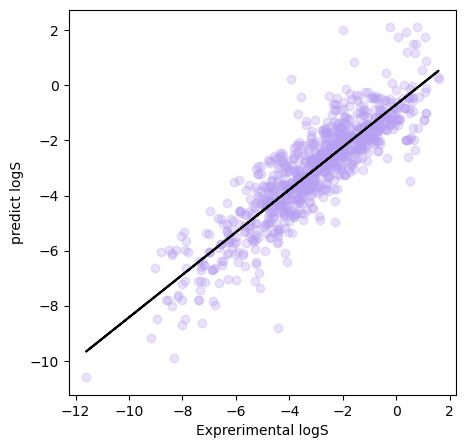

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,5))
plt.scatter(x=y_train,y=y_lr_train_pred,c='#B79FF1',alpha=0.3)
r=np.polyfit(y_train,y_lr_train_pred,1)
p=np.poly1d(r)
plt.plot(y_train,p(y_train),"#000000")
plt.ylabel('predict logS')
plt.xlabel('Exprerimental logS')
